# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it.

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16).
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [ ]:
import random

class Card:

    suits = ["Hearts", "Diamonds", "Clubs", "Spades"]
    ranks = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]

    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank

    def __str__(self):
        return f"{self.rank} of {self.suit}"


class Deck:
    #deck with multiple 52-card sets and a plastic card.

    def __init__(self, num_decks=6):
        self.num_decks = num_decks
        self.cards = self.create_deck()
        self.shuffle()
        self.plastic_card_position = random.randint(0, len(self.cards) - 1)

    def create_deck(self):

        return [Card(suit, rank) for _ in range(self.num_decks) for suit in Card.suits for rank in Card.ranks]

    def shuffle(self):

        random.shuffle(self.cards)

    def draw_card(self):
        #Reshuffle when the plastic card is reached.
        if len(self.cards) <= self.plastic_card_position:
            self.cards = self.create_deck()
            self.shuffle()
            self.plastic_card_position = random.randint(0, len(self.cards) - 1)
        return self.cards.pop() if self.cards else None


In [ ]:
# Initialize deck
deck = Deck(num_decks=6)

# number of cards in the deck
num_cards_initial = len(deck.cards)


drawn_cards = [deck.draw_card() for _ in range(5)]

#remaining number of cards after drawing
num_cards_after_drawing = len(deck.cards)

# reshuffles after reaching the plastic card
reshuffled = False
while len(deck.cards) > 0:
    card = deck.draw_card()
    if len(deck.cards) <= deck.plastic_card_position:
        reshuffled = True
        break

(num_cards_initial, drawn_cards, num_cards_after_drawing, reshuffled)


(312,
 307,
 True)

2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook.

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [ ]:
import random

class Card:

    suits = ["Hearts", "Diamonds", "Clubs", "Spades"]
    ranks = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]

    def __init__(self, suit, rank):
        self.suit, self.rank = suit, rank

    def __repr__(self):
        return f"{self.rank} of {self.suit}"


class Deck:


    def __init__(self, num_sets=6):
        self.num_sets = num_sets
        self.cards = [Card(suit, rank) for _ in range(num_sets)
                      for suit in Card.suits for rank in Card.ranks]
        self.plastic_index = random.randint(60, len(self.cards) - 60)  # Plastic card randomly placed in our deck
        self.shuffle()

    def shuffle(self):
        random.shuffle(self.cards)

    def draw(self):
        if len(self.cards) <= self.plastic_index:
            print("Reached plastic card, reshuffling deck.")
            self.cards = [Card(suit, rank) for _ in range(self.num_sets)
                          for suit in Card.suits for rank in Card.ranks]
            self.shuffle()
            self.plastic_index = random.randint(60, len(self.cards) - 60)
        return self.cards.pop()

    def __repr__(self):
        return f"Deck of {len(self.cards)} cards"


class Player:
    def __init__(self, name, chips=100):
        self.name = name
        self.chips = chips
        self.hand = []

    def bet(self, amount):
        self.chips -= amount

    def win(self, amount):
        self.chips += amount

    def lose(self, amount):
        self.chips -= amount

    def __repr__(self):
        return f"Player({self.name}, Chips: {self.chips}, Hand: {self.hand})"


class CountingPlayer(Player):
    def __init__(self, name, threshold):
        super().__init__(name)
        self.threshold = threshold
        self.count = 0

    def update_count(self, card):
        # Basic card counting example
        if card.rank in ["2", "3", "4", "5", "6"]:
            self.count += 1
        elif card.rank in ["10", "J", "Q", "K", "A"]:
            self.count -= 1

    def decide(self):
        # Decision based on threshold
        return "Bet High" if self.count >= self.threshold else "Bet Low"

    def __repr__(self):
        return f"CountingPlayer({self.name}, Chips: {self.chips}, Count: {self.count}, Hand: {self.hand})"


class Dealer(Player):
    def decide(self):

        hand_value = sum(
            10 if card.rank in ["J", "Q", "K"] else int(card.rank)
            if card.rank.isdigit() else 11 for card in self.hand)
        return "Hit" if hand_value <= 16 else "Stay"

    def __repr__(self):
        return f"Dealer(Hand: {self.hand})"


def simulate_round(players, deck):
    # Simulate a round of drawing one card for each player
    for player in players:
        card = deck.draw()
        player.hand.append(card)
        if isinstance(player, CountingPlayer):
            player.update_count(card)

def simulate_game():

    print("Simulating a full game...")
    # Initialization
    deck = Deck()
    dealer = Dealer("Dealer")
    players = [CountingPlayer("Alice", threshold=3), Player("Bob", chips=100)]
    players.append(dealer)


    simulate_round(players, deck)

    # players' hands and counts
    for player in players:
        print(player)


4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [ ]:
class Player:
    def __init__(self, name, chips=100):
        self.name = name
        self.chips = chips
        self.hand = []

    def bet(self, amount):
        if amount > self.chips:
            raise ValueError("Insufficient chips to place the bet.")
        self.chips -= amount
        return amount

    def win(self, amount):
        self.chips += amount

    def lose(self, amount):
        self.chips -= amount

    def add_card(self, card):
        self.hand.append(card)

    def calculate_hand_value(self):
        total = 0
        aces = 0
        for card in self.hand:
            total += card.value
            if card.rank == "A":
                aces += 1
        # Adjust for Aces if total is over 21
        while total > 21 and aces:
            total -= 10
            aces -= 1
        return total

    def is_bust(self):
        return self.calculate_hand_value() > 21

    def show_hand(self):
        return ', '.join(str(card) for card in self.hand)

    def __repr__(self):
        return f"Player({self.name}, Chips: {self.chips}, Hand: {self.hand})"


class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer", chips=float("inf"))

    def decide(self):
        # Dealer hits on 16 or lower and stays on 17 or higher
        return "Hit" if self.calculate_hand_value() < 17 else "Stay"

    def __repr__(self):
        return f"Dealer(Hand: {self.show_hand()})"


5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [ ]:
import random

class Card:

    suits = ["Hearts", "Diamonds", "Clubs", "Spades"]
    ranks = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
    values = {str(i): i for i in range(2, 11)}
    values.update({"J": 10, "Q": 10, "K": 10, "A": 11})

    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank
        self.value = Card.values[rank]

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:

    def __init__(self, num_sets=6):
        self.num_sets = num_sets
        self.cards = [Card(suit, rank) for _ in range(num_sets)
                      for suit in Card.suits for rank in Card.ranks]
        self.shuffle()

    def shuffle(self):
        random.shuffle(self.cards)

    def draw(self):
        return self.cards.pop()

    def __repr__(self):
        return f"Deck of {len(self.cards)} cards"

class Player:
    def __init__(self, name, chips=100):
        self.name = name
        self.chips = chips
        self.hand = []

    def bet(self, amount):
        if amount > self.chips:
            raise ValueError("Insufficient chips to place the bet.")
        self.chips -= amount
        return amount

    def win(self, amount):
        self.chips += amount

    def lose(self, amount):  # Added lose method to deduct chips
        self.chips -= amount

    def add_card(self, card):
        self.hand.append(card)

    def calculate_hand_value(self):
        total = 0
        aces = 0
        for card in self.hand:
            total += card.value
            if card.rank == "A":
                aces += 1
        while total > 21 and aces:
            total -= 10
            aces -= 1
        return total

    def is_bust(self):
        return self.calculate_hand_value() > 21

    def clear_hand(self):
        self.hand.clear()

    def show_hand(self):
        return ', '.join(str(card) for card in self.hand)

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer", chips=float("inf"))

    def decide(self):
        return "Hit" if self.calculate_hand_value() < 17 else "Stay"

def play_round(deck, player, dealer):
    # Clear hands
    player.clear_hand()
    dealer.clear_hand()

    # Initial deal: two cards each
    for _ in range(2):
        player.add_card(deck.draw())
        dealer.add_card(deck.draw())

    print(f"{player.name}'s starting hand: {player.show_hand()} (Value: {player.calculate_hand_value()})")
    print(f"Dealer's visible card: {dealer.hand[0]}")

    # hit until reaching 17 or more
    while player.calculate_hand_value() < 17:
        player.add_card(deck.draw())
        print(f"{player.name}'s hand: {player.show_hand()} (Value: {player.calculate_hand_value()})")
        if player.is_bust():
            print(f"{player.name} busts! Dealer wins.")
            return "dealer"

    # Dealer's Turn
    while dealer.decide() == "Hit":
        dealer.add_card(deck.draw())
        print(f"Dealer's hand: {dealer.show_hand()} (Value: {dealer.calculate_hand_value()})")
        if dealer.is_bust():
            print("Dealer busts! Player wins.")
            return "player"

    # Compare hands
    player_total = player.calculate_hand_value()
    dealer_total = dealer.calculate_hand_value()
    print(f"{player.name}'s final hand value: {player_total}")
    print(f"Dealer's final hand value: {dealer_total}")

    if player_total > dealer_total:
        print(f"{player.name} wins!")
        return "player"
    elif player_total < dealer_total:
        print("Dealer wins!")
        return "dealer"
    else:
        print("It's a tie!")
        return "tie"




In [ ]:
# Test
deck = Deck()
player = Player(name="Automated Player", chips=100)
dealer = Dealer()

# trial rounds
for i in range(3):
    print(f"\n--- Round {i + 1} ---")
    result = play_round(deck, player, dealer)
    if result == "player":
        player.win(10)
    elif result == "dealer":
        player.lose(10)

    print(f"{player.name} chips: {player.chips}")
    if player.chips <= 0:
        print(f"{player.name} is out of chips!")
        break
    deck.shuffle()  # Shuffle deck after each round


--- Round 1 ---
Automated Player's starting hand: Q of Hearts, A of Hearts (Value: 21)
Dealer's visible card: J of Hearts
Automated Player's final hand value: 21
Dealer's final hand value: 20
Automated Player wins!
Automated Player chips: 110

--- Round 2 ---
Automated Player's starting hand: K of Clubs, 5 of Spades (Value: 15)
Dealer's visible card: Q of Spades
Automated Player's hand: K of Clubs, 5 of Spades, K of Diamonds (Value: 25)
Automated Player busts! Dealer wins.
Automated Player chips: 100

--- Round 3 ---
Automated Player's starting hand: 7 of Hearts, 9 of Hearts (Value: 16)
Dealer's visible card: A of Spades
Automated Player's hand: 7 of Hearts, 9 of Hearts, 5 of Spades (Value: 21)
Automated Player's final hand value: 21
Dealer's final hand value: 17
Automated Player wins!
Automated Player chips: 110


6. Implement a new player with the following strategy:

    * Assign each card a value:
        * Cards 2 to 6 are +1
        * Cards 7 to 9 are 0
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [ ]:
import random

class Card:

    suits = ["Hearts", "Diamonds", "Clubs", "Spades"]
    ranks = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
    values = {str(i): i for i in range(2, 11)}
    values.update({"J": 10, "Q": 10, "K": 10, "A": 11})

    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank
        self.value = Card.values[rank]

    def __repr__(self):
        return f"{self.rank} of {self.suit}"

class Deck:

    def __init__(self, num_sets=6):
        self.num_sets = num_sets
        self.cards = [Card(suit, rank) for _ in range(num_sets)
                      for suit in Card.suits for rank in Card.ranks]
        self.shuffle()

    def shuffle(self):
        random.shuffle(self.cards)

    def draw(self):
        return self.cards.pop()

class Player:
    def __init__(self, name, chips=100):
        self.name = name
        self.chips = chips
        self.hand = []

    def bet(self, amount):
        if amount > self.chips:
            raise ValueError("Not enough chips to place the bet.")
        self.chips -= amount
        return amount

    def win(self, amount):
        self.chips += amount

    def lose(self, amount):
        self.chips -= amount

    def add_card(self, card):
        self.hand.append(card)

    def calculate_hand_value(self):
        total = 0
        aces = 0
        for card in self.hand:
            total += card.value
            if card.rank == "A":
                aces += 1 # adding by one to keep calculating? still not sure how this part of the game translates into code
        while total > 21 and aces:
            total -= 10
            aces -= 1
        return total

    def is_bust(self):
        return self.calculate_hand_value() > 21

    def clear_hand(self):
        self.hand.clear()

    def show_hand(self):
        return ', '.join(str(card) for card in self.hand)

class Dealer(Player):
    def __init__(self):
        super().__init__("Dealer", chips=float("inf"))

    def decide(self):
        return "Hit" if self.calculate_hand_value() < 17 else "Stay"

class CountingPlayer(Player):
    def __init__(self, name, threshold=-2):
        super().__init__(name)
        self.count = 0  # Running count for card values seen so far
        self.threshold = threshold
    def add_card(self, card):
        super().add_card(card)
        self.update_count(card)

    def update_count(self, card):
        # Adjust the count based on the card value as per the strategy
        if card.rank in ["2", "3", "4", "5", "6"]:
            self.count += 1
        elif card.rank in ["10", "J", "Q", "K", "A"]:
            self.count -= 1


    def decide(self):
        # decision based on the current count
        decision = "Hit" if self.count <= self.threshold else "Stay"
        print(f"{self.name} decision: {decision} (Current Count: {self.count})")
        return decision

def play_round(deck, player, dealer):
    # Clear hands in order to start the game, to ensure fairness right?
    player.clear_hand()
    dealer.clear_hand()


    for _ in range(2):
        player.add_card(deck.draw())
        dealer.add_card(deck.draw())

    print(f"{player.name}'s starting hand: {player.show_hand()} (Value: {player.calculate_hand_value()})")
    print(f"Dealer's visible card: {dealer.hand[0]}")

    # using the counting strategy
    while player.calculate_hand_value() < 21:
        action = player.decide()
        if action == "Hit":
            player.add_card(deck.draw())
            print(f"{player.name}'s hand: {player.show_hand()} (Value: {player.calculate_hand_value()})")
            if player.is_bust():
                print(f"{player.name} busts! Dealer wins.")
                return "dealer"
        else:
            break

    # Dealer's turn
    while dealer.decide() == "Hit":
        dealer.add_card(deck.draw())
        print(f"Dealer's hand: {dealer.show_hand()} (Value: {dealer.calculate_hand_value()})")
        if dealer.is_bust():
            print("Dealer busts! Player wins.")
            return "player"

    # Compare hands
    player_total = player.calculate_hand_value()
    dealer_total = dealer.calculate_hand_value()
    print(f"{player.name}'s final hand value: {player_total}")
    print(f"Dealer's final hand value: {dealer_total}")

    if player_total > dealer_total:
        print(f"{player.name} wins!")
        return "player"
    elif player_total < dealer_total:
        print("Dealer wins!")
        return "dealer"
    else:
        print("It's a tie!")
        return "tie"

## Testing it out

In [ ]:
# Test
deck = Deck()
counting_player = CountingPlayer(name="Counting Player", threshold=-2)
dealer = Dealer()


for i in range(5):
    print(f"\n--- Round {i + 1} ---")
    result = play_round(deck, counting_player, dealer)
    if result == "player":
        counting_player.win(10)
    elif result == "dealer":
        counting_player.lose(10)

    print(f"{counting_player.name} chips: {counting_player.chips}, Count: {counting_player.count}")
    if counting_player.chips <= 0:
        print(f"{counting_player.name} is out of chips!")
        break
    deck.shuffle()  # Shuffle deck after each round



--- Round 1 ---
Counting Player's starting hand: 4 of Spades, 6 of Hearts (Value: 10)
Dealer's visible card: 9 of Spades
Counting Player decision: Stay (Current Count: 2)
Dealer's hand: 9 of Spades, 6 of Hearts, Q of Spades (Value: 25)
Dealer busts! Player wins.
Counting Player chips: 110, Count: 2

--- Round 2 ---
Counting Player's starting hand: 10 of Clubs, 8 of Spades (Value: 18)
Dealer's visible card: 5 of Diamonds
Counting Player decision: Stay (Current Count: 1)
Dealer's hand: 5 of Diamonds, J of Diamonds, K of Diamonds (Value: 25)
Dealer busts! Player wins.
Counting Player chips: 120, Count: 1

--- Round 3 ---
Counting Player's starting hand: 5 of Diamonds, Q of Diamonds (Value: 15)
Dealer's visible card: A of Clubs
Counting Player decision: Stay (Current Count: 1)
Counting Player's final hand value: 15
Dealer's final hand value: 18
Dealer wins!
Counting Player chips: 110, Count: 1

--- Round 4 ---
Counting Player's starting hand: Q of Diamonds, 8 of Hearts (Value: 18)
Dealer'

7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [ ]:
import random

class Card:

    suits = ["Hearts", "Diamonds", "Clubs", "Spades"]
    ranks = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
    values = {str(i): i for i in range(2, 11)}
    values.update({"J": 10, "Q": 10, "K": 10, "A": 11})

    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank
        self.value = Card.values[rank]

class Deck:

    def __init__(self, num_sets=6):
        self.num_sets = num_sets
        self.cards = [Card(suit, rank) for _ in range(num_sets)
                      for suit in Card.suits for rank in Card.ranks]
        self.shuffle()

    def shuffle(self):
        random.shuffle(self.cards)

    def draw(self):
        return self.cards.pop()
    def draw(self):
      if not self.cards:  # Check if the deck is empty
          self.cards = [Card(suit, rank) for _ in range(self.num_sets)
                         for suit in Card.suits for rank in Card.ranks]
          self.shuffle()  # Reshuffle if empty
      return self.cards.pop()

class Player:
    def __init__(self, name, chips=100, quiet_mode=True):
        self.name = name
        self.chips = chips
        self.hand = []
        self.quiet_mode = quiet_mode

    def bet(self, amount):
        if amount > self.chips:
            raise ValueError("Insufficient chips to place the bet.")
        self.chips -= amount
        return amount

    def win(self, amount):
        self.chips += amount

    def lose(self, amount):
        self.chips -= amount

    def add_card(self, card):
        self.hand.append(card)

    def calculate_hand_value(self):
        total = 0
        aces = 0
        for card in self.hand:
            total += card.value
            if card.rank == "A":
                aces += 1
        while total > 21 and aces:
            total -= 10
            aces -= 1
        return total

    def is_bust(self):
        return self.calculate_hand_value() > 21

    def clear_hand(self):
        self.hand.clear()

    def show_hand(self):
        return ', '.join(str(card) for card in self.hand)

class Dealer(Player):
    def decide(self):
        return "Hit" if self.calculate_hand_value() < 17 else "Stay"
    def __init__(self, name="Dealer", quiet_mode=True):  # Include quiet_mode in Dealer's __init__
        super().__init__(name, chips=float("inf"), quiet_mode=quiet_mode) # Pass quiet_mode to Player's __init__

class CountingPlayer(Player):
    def __init__(self, name, threshold=-2, chips=100, quiet_mode=True):
        super().__init__(name, chips, quiet_mode)
        self.count = 0
        self.threshold = threshold

    def add_card(self, card):
        super().add_card(card)
        self.update_count(card)

    def update_count(self, card):
        if card.rank in ["2", "3", "4", "5", "6"]:
            self.count += 1
        elif card.rank in ["10", "J", "Q", "K", "A"]:
            self.count -= 1

    def decide(self):
        decision = "Hit" if self.count <= self.threshold else "Stay"
        if not self.quiet_mode:
            print(f"{self.name} decision: {decision} (Current Count: {self.count})")
        return decision

def play_round(deck, players, dealer, quiet_mode=True):
    # Clear hands
    for player in players:
        player.clear_hand()
    dealer.clear_hand()


    for _ in range(2):
        for player in players:
            player.add_card(deck.draw())
        dealer.add_card(deck.draw())

    # Each player's turn
    for player in players:
        while player.calculate_hand_value() < 21:
            action = player.decide() if isinstance(player, CountingPlayer) else dealer.decide()
            if action == "Hit":
                player.add_card(deck.draw())
                if player.is_bust():
                    if not quiet_mode:
                        print(f"{player.name} busts! Dealer wins.")
                    player.lose(10)
                    break
            else:
                break

    # Dealer's turn
    while dealer.decide() == "Hit":
        dealer.add_card(deck.draw())
        if dealer.is_bust():
            if not quiet_mode:
                print("Dealer busts!")
            for player in players:
                if not player.is_bust():
                    player.win(10)
            return

    # Compare hands for each player against the dealer
    dealer_total = dealer.calculate_hand_value()
    for player in players:
        player_total = player.calculate_hand_value()
        if not player.is_bust() and player_total > dealer_total:
            if not quiet_mode:
                print(f"{player.name} wins against dealer!")
            player.win(10)
        elif player_total < dealer_total or player.is_bust():
            player.lose(10)



In [ ]:
# editing this class to fix error
class CountingPlayer(Player):
    def __init__(self, name, threshold=-2, chips=100, quiet_mode=True):
        super().__init__(name, chips=chips, quiet_mode=quiet_mode)  # Pass chips to Player.__init__
        self.count = 0
        self.threshold = threshold

In [ ]:
# editing the entire class not just part of it, but only for this question
class CountingPlayer(Player):
    def __init__(self, name, threshold=-2, chips=100, quiet_mode=True):
        super().__init__(name, chips=chips, quiet_mode=quiet_mode)  # Pass chips to Player.__init__
        self.count = 0
        self.threshold = threshold

    def add_card(self, card):
        super().add_card(card)
        self.update_count(card)

    def update_count(self, card):
        if card.rank in ["2", "3", "4", "5", "6"]:
            self.count += 1
        elif card.rank in ["10", "J", "Q", "K", "A"]:
            self.count -= 1

    def decide(self):
        decision = "Hit" if self.count <= self.threshold else "Stay"
        if not self.quiet_mode:
            print(f"{self.name} decision: {decision} (Current Count: {self.count})")
        return decision

In [ ]:
# Test
deck = Deck()
counting_player = CountingPlayer(name="Counting Player", threshold=-2, chips=100, quiet_mode=True)
dealer = Dealer(name="Dealer", quiet_mode=True)
other_players = [Player(name=f"Player {i}", chips=100, quiet_mode=True) for i in range(1, 4)]
all_players = [counting_player] + other_players

#  50 rounds or until the CountingPlayer is out of money
rounds = 50
for i in range(rounds):
    play_round(deck, all_players, dealer, quiet_mode=True)
    deck.shuffle()

    # Check if CountingPlayer is out of money
    if counting_player.chips <= 0:
        print(f"{counting_player.name} is out of chips!")
        break


initial_chips = 100
final_winnings = counting_player.chips - initial_chips
print(f"{counting_player.name} final chips: {counting_player.chips}")
print(f"{counting_player.name} net winnings: {final_winnings}") # should be negative if they have no more chips

Counting Player is out of chips!
Counting Player final chips: 0
Counting Player net winnings: -100


8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

class Card:
    suits = ["Hearts", "Diamonds", "Clubs", "Spades"]
    ranks = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
    values = {str(i): i for i in range(2, 11)}
    values.update({"J": 10, "Q": 10, "K": 10, "A": 11})

    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank
        self.value = Card.values[rank]

class Deck:
    def __init__(self, num_sets=6):
        self.num_sets = num_sets
        self.cards = [Card(suit, rank) for _ in range(num_sets)
                      for suit in Card.suits for rank in Card.ranks]
        self.shuffle()  # Shuffle the deck upon initialization

    def shuffle(self):

        random.shuffle(self.cards)

    def draw(self):

        if len(self.cards) == 0:  # Check if deck is empty
            self.reshuffle()
        return self.cards.pop()

    def reshuffle(self):

        self.cards = [Card(suit, rank) for _ in range(self.num_sets)
                      for suit in Card.suits for rank in Card.ranks]
        self.shuffle()

class Player:

    def __init__(self, name, chips=100, quiet_mode=True):
        self.name = name
        self.chips = chips
        self.hand = []
        self.quiet_mode = quiet_mode  # Controls verbosity of output

    def bet(self, amount):

        if amount > self.chips:
            raise ValueError("Insufficient chips to place the bet.")
        self.chips -= amount
        return amount

    def win(self, amount):

        self.chips += amount

    def lose(self, amount):

        self.chips -= amount

    def add_card(self, card):

        self.hand.append(card)

    def calculate_hand_value(self):

        total = 0
        aces = 0
        for card in self.hand:
            total += card.value
            if card.rank == "A":
                aces += 1
        while total > 21 and aces:
            total -= 10  # Reduce ace value from 11 to 1 if total is over 21
            aces -= 1
        return total

    def is_bust(self):
        """Check if the player is bust (hand value over 21)."""
        return self.calculate_hand_value() > 21

    def clear_hand(self):
        """Clear the player's hand for a new round."""
        self.hand.clear()

class Dealer(Player):
    """Represents a dealer player with a fixed strategy."""
    def decide(self):

        return "Hit" if self.calculate_hand_value() < 17 else "Stay"

class CountingPlayer(Player):
    """Player with a card-counting strategy."""
    def __init__(self, name, threshold=-2, chips=100, quiet_mode=True):
        super().__init__(name, chips, quiet_mode)
        self.count = 0  # Running count for card values seen so far
        self.threshold = threshold  # Threshold to determine hit/stay decisions

    def add_card(self, card):
        """Add a card to the hand and update the count based on its value."""
        super().add_card(card)
        self.update_count(card)

    def update_count(self, card):

        if card.rank in ["2", "3", "4", "5", "6"]:
            self.count += 1
        elif card.rank in ["10", "J", "Q", "K", "A"]:
            self.count -= 1
        # Cards 7 to 9 have no impact on the count

    def decide(self):
        """Decide whether to hit or stay based on the current count."""
        decision = "Hit" if self.count <= self.threshold else "Stay"
        return decision

def play_round(deck, players, dealer):
    """Play a single round of blackjack for each player and the dealer."""
    # Clear hands at the start of the round, to ensure fairness
    for player in players:
        player.clear_hand()
    dealer.clear_hand()


    for _ in range(2):
        for player in players:
            player.add_card(deck.draw())
        dealer.add_card(deck.draw())

    # Each player's turn based on their strategy
    for player in players:
        while player.calculate_hand_value() < 21:
            action = player.decide() if isinstance(player, CountingPlayer) else dealer.decide()
            if action == "Hit":
                player.add_card(deck.draw())
                if player.is_bust():  # Player busts
                    player.lose(10)
                    break
            else:
                break

    # Dealer's turn following the dealer's rules
    while dealer.decide() == "Hit":
        dealer.add_card(deck.draw())
        if dealer.is_bust():  # Dealer busts; all non-bust players win
            for player in players:
                if not player.is_bust():
                    player.win(10)
            return

    # Compare hands: if player's hand is higher, they win; otherwise, they lose
    dealer_total = dealer.calculate_hand_value()
    for player in players:
        player_total = player.calculate_hand_value()
        if not player.is_bust() and player_total > dealer_total:
            player.win(10)
        elif player_total < dealer_total or player.is_bust():
            player.lose(10)


## Testing out code

Average net winnings after 50 rounds: -96.1
Standard deviation of net winnings: 23.99562460116427
Probability of net win after 50 rounds: 0.02
Probability of net loss after 50 rounds: 0.97
Average net winnings per round: -1.922


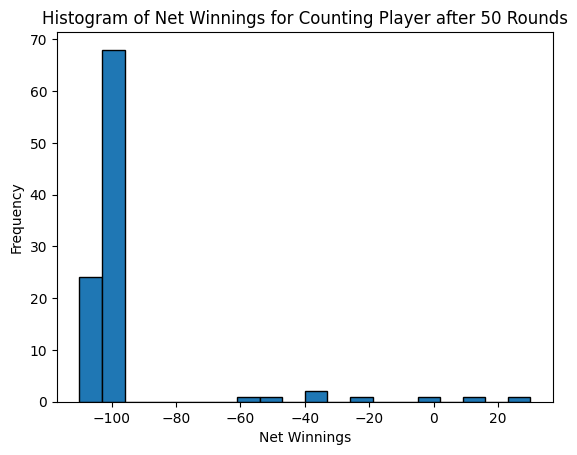

In [ ]:
num_games = 100
num_rounds = 50
initial_chips = 100

# Track final chips of CountingPlayer after each game
winnings = []

#run the simulation
for game in range(num_games):

    deck = Deck()
    counting_player = CountingPlayer(name="Counting Player", threshold=-2, chips=initial_chips, quiet_mode=True)
    dealer = Dealer(name="Dealer", quiet_mode=True)
    other_players = [Player(name=f"Player {i}", chips=initial_chips, quiet_mode=True) for i in range(1, 4)]
    all_players = [counting_player] + other_players

    # Play specified number of rounds or until counting player is out of chips
    for _ in range(num_rounds):
        play_round(deck, all_players, dealer)
        deck.shuffle()

        if counting_player.chips <= 0:  # End game early if counting player is out of chips
            break

    # Record the final chips of the CountingPlayer after each game
    winnings.append(counting_player.chips)

# Calculate net winnings by subtracting initial chips
net_winnings = [chips - initial_chips for chips in winnings]

# Compute average and standard deviation of net winnings
average_winnings = np.mean(net_winnings)
std_dev = np.std(net_winnings)

# Probability of net win/loss
positive_outcomes = sum(1 for win in net_winnings if win > 0)
negative_outcomes = sum(1 for win in net_winnings if win < 0)
prob_win = positive_outcomes / num_games
prob_loss = negative_outcomes / num_games

# results
print(f"Average net winnings after 50 rounds: {average_winnings}")
print(f"Standard deviation of net winnings: {std_dev}")
print(f"Probability of net win after 50 rounds: {prob_win}")
print(f"Probability of net loss after 50 rounds: {prob_loss}")
# average net winnings per round
average_winnings_per_game = np.mean(net_winnings)
average_winnings_per_round = average_winnings_per_game / num_rounds

print(f"Average net winnings per round: {average_winnings_per_round}")


plt.hist(net_winnings, bins=20, edgecolor='black')
plt.title("Histogram of Net Winnings for Counting Player after 50 Rounds")
plt.xlabel("Net Winnings")
plt.ylabel("Frequency")
plt.show()


9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

class Card:

    suits = ["Hearts", "Diamonds", "Clubs", "Spades"]
    ranks = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
    values = {str(i): i for i in range(2, 11)}
    values.update({"J": 10, "Q": 10, "K": 10, "A": 11})

    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank
        self.value = Card.values[rank]

class Deck:

    def __init__(self, num_sets=6):
        self.num_sets = num_sets
        self.cards = [Card(suit, rank) for _ in range(num_sets)
                      for suit in Card.suits for rank in Card.ranks]
        self.shuffle()  # Shuffle the deck upon initialization

    def shuffle(self):

        random.shuffle(self.cards)

    def draw(self):

        if len(self.cards) == 0:  # Check if deck is empty
            self.reshuffle()
        return self.cards.pop()

    def reshuffle(self):

        self.cards = [Card(suit, rank) for _ in range(self.num_sets)
                      for suit in Card.suits for rank in Card.ranks]
        self.shuffle()

class Player:

    def __init__(self, name, chips=100, quiet_mode=True):
        self.name = name
        self.chips = chips
        self.hand = []
        self.quiet_mode = quiet_mode  # Controls verbosity of output

    def bet(self, amount):

        if amount > self.chips:
            raise ValueError("Insufficient chips to place the bet.")
        self.chips -= amount
        return amount

    def win(self, amount):

        self.chips += amount

    def lose(self, amount):

        self.chips -= amount

    def add_card(self, card):
        """Add a card to the player's hand."""
        self.hand.append(card)

    def calculate_hand_value(self):

        total = 0
        aces = 0
        for card in self.hand:
            total += card.value
            if card.rank == "A":
                aces += 1
        while total > 21 and aces:
            total -= 10  # Reduce ace value from 11 to 1 if total is over 21
            aces -= 1
        return total

    def is_bust(self):

        return self.calculate_hand_value() > 21

    def clear_hand(self):

        self.hand.clear()

class Dealer(Player):

    def decide(self):

        return "Hit" if self.calculate_hand_value() < 17 else "Stay"

class CountingPlayer(Player):
    """Player with a card-counting strategy."""
    def __init__(self, name, threshold=-2, chips=100, quiet_mode=True):
        super().__init__(name, chips, quiet_mode)
        self.count = 0  # Running count for card values seen so far
        self.threshold = threshold  # Threshold to determine hit/stay decisions

    def add_card(self, card):

        super().add_card(card)
        self.update_count(card)

    def update_count(self, card):

        if card.rank in ["2", "3", "4", "5", "6"]:
            self.count += 1
        elif card.rank in ["10", "J", "Q", "K", "A"]:
            self.count -= 1
        # Cards 7 to 9 left out; they don't affect the count

    def decide(self):
        """Decide whether to hit or stay based on the current count."""
        decision = "Hit" if self.count <= self.threshold else "Stay"
        return decision

def play_round(deck, players, dealer):
    """Play a single round of blackjack for each player and the dealer."""
    # Clear hands
    for player in players:
        player.clear_hand()
    dealer.clear_hand()


    for _ in range(2):
        for player in players:
            player.add_card(deck.draw())
        dealer.add_card(deck.draw())

    # Each player's turn based on their strategy
    for player in players:
        while player.calculate_hand_value() < 21:
            action = player.decide() if isinstance(player, CountingPlayer) else dealer.decide()
            if action == "Hit":
                player.add_card(deck.draw())
                if player.is_bust():  # Player busts
                    player.lose(10)
                    break
            else:
                break

    # Dealer's turn following the dealer's rules
    while dealer.decide() == "Hit":
        dealer.add_card(deck.draw())
        if dealer.is_bust():  # Dealer busts; all non-bust players win
            for player in players:
                if not player.is_bust():
                    player.win(10)
            return

    # if player's hand is higher, they win; otherwise, they lose
    dealer_total = dealer.calculate_hand_value()
    for player in players:
        player_total = player.calculate_hand_value()
        if not player.is_bust() and player_total > dealer_total:
            player.win(10)
        elif player_total < dealer_total or player.is_bust():
            player.lose(10)



## Testing code out

In [ ]:

num_games = 100
num_rounds = 50
initial_chips = 100
thresholds = [-4, -3, -2, -1, 0]

results = []

# Loop
for threshold in thresholds:
    winnings = []

    for game in range(num_games):
        # Initialize deck, counting player, dealer, and other players
        deck = Deck()
        counting_player = CountingPlayer(name="Counting Player", threshold=threshold, chips=initial_chips, quiet_mode=True)
        dealer = Dealer(name="Dealer", quiet_mode=True)
        other_players = [Player(name=f"Player {i}", chips=initial_chips, quiet_mode=True) for i in range(1, 4)]
        all_players = [counting_player] + other_players

        # play specified number of rounds or until counting player is out of chips
        for _ in range(num_rounds):
            play_round(deck, all_players, dealer)
            deck.shuffle()

            if counting_player.chips <= 0:  # End game early if counting player is out of chips
                break

        # Rcord the final chips of the CountingPlayer after each game
        winnings.append(counting_player.chips)

    # calculate net winnings and statistics for this threshold
    net_winnings = [chips - initial_chips for chips in winnings]
    average_winnings = np.mean(net_winnings)
    std_dev = np.std(net_winnings)
    prob_win = sum(1 for win in net_winnings if win > 0) / num_games
    prob_loss = sum(1 for win in net_winnings if win < 0) / num_games

    results.append({
        "threshold": threshold,
        "average_winnings": average_winnings,
        "std_dev": std_dev,
        "prob_win": prob_win,
        "prob_loss": prob_loss
    })

for result in results:
    print(f"Threshold: {result['threshold']}")
    print(f"  Average net winnings after 50 rounds: {result['average_winnings']}")
    print(f"  Standard deviation of net winnings: {result['std_dev']}")
    print(f"  Probability of net win after 50 rounds: {result['prob_win']}")
    print(f"  Probability of net loss after 50 rounds: {result['prob_loss']}\n")


Threshold: -4
  Average net winnings after 50 rounds: -91.3
  Standard deviation of net winnings: 25.83234406707994
  Probability of net win after 50 rounds: 0.01
  Probability of net loss after 50 rounds: 0.98

Threshold: -3
  Average net winnings after 50 rounds: -93.4
  Standard deviation of net winnings: 26.42801543816713
  Probability of net win after 50 rounds: 0.04
  Probability of net loss after 50 rounds: 0.96

Threshold: -2
  Average net winnings after 50 rounds: -99.9
  Standard deviation of net winnings: 9.64313227120732
  Probability of net win after 50 rounds: 0.0
  Probability of net loss after 50 rounds: 1.0

Threshold: -1
  Average net winnings after 50 rounds: -100.0
  Standard deviation of net winnings: 8.12403840463596
  Probability of net win after 50 rounds: 0.0
  Probability of net loss after 50 rounds: 1.0

Threshold: 0
  Average net winnings after 50 rounds: -101.9
  Standard deviation of net winnings: 9.868637190615532
  Probability of net win after 50 rounds:

## -4 has the most average net winning

10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings.

## Using the odds to minimize losses

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

class Card:

    suits = ["Hearts", "Diamonds", "Clubs", "Spades"]
    ranks = ["2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K", "A"]
    values = {str(i): i for i in range(2, 11)}
    values.update({"J": 10, "Q": 10, "K": 10, "A": 11})

    def __init__(self, suit, rank):
        self.suit = suit
        self.rank = rank
        self.value = Card.values[rank]

class Deck:

    def __init__(self, num_sets=6):
        self.num_sets = num_sets
        self.cards = [Card(suit, rank) for _ in range(num_sets)
                      for suit in Card.suits for rank in Card.ranks]
        self.shuffle()  # Shuffle the deck upon initialization

    def shuffle(self):

        random.shuffle(self.cards)

    def draw(self):

        if len(self.cards) == 0:  # Check if deck is empty
            self.reshuffle()
        return self.cards.pop()

    def reshuffle(self):

        self.cards = [Card(suit, rank) for _ in range(self.num_sets)
                      for suit in Card.suits for rank in Card.ranks]
        self.shuffle()

class Player:

    def __init__(self, name, chips=100, quiet_mode=True):
        self.name = name
        self.chips = chips
        self.hand = []
        self.quiet_mode = quiet_mode  # Controls verbosity of output

    def bet(self, amount):

        if amount > self.chips:
            raise ValueError("Insufficient chips to place the bet.")
        self.chips -= amount
        return amount

    def win(self, amount):

        self.chips += amount

    def lose(self, amount):

        self.chips -= amount

    def add_card(self, card):

        self.hand.append(card)

    def calculate_hand_value(self):

        total = 0
        aces = 0
        for card in self.hand:
            total += card.value
            if card.rank == "A":
                aces += 1
        while total > 21 and aces:
            total -= 10  # Reduce ace value from 11 to 1 if total is over 21
            aces -= 1
        return total

    def is_bust(self):

        return self.calculate_hand_value() > 21

    def clear_hand(self):

        self.hand.clear()

class Dealer(Player):

    def decide(self):

        return "Hit" if self.calculate_hand_value() < 17 else "Stay"

class AdaptiveCountingPlayer(Player):

    def __init__(self, name, chips=100, quiet_mode=True):
        super().__init__(name, chips, quiet_mode)
        self.count = 0  # Running count for card values seen so far
        self.low_threshold = -2  # Conservative play threshold
        self.high_threshold = 2   # Aggressive play threshold

    def add_card(self, card):

        super().add_card(card)
        self.update_count(card)

    def update_count(self, card):

        if card.rank in ["2", "3", "4", "5", "6"]:
            self.count += 1
        elif card.rank in ["10", "J", "Q", "K", "A"]:
            self.count -= 1
        # Cards 7 to 9 have no impact on the count

    def decide(self):

        if self.count >= self.high_threshold:
            return "Hit" if self.calculate_hand_value() < 17 else "Stay"
        elif self.count <= self.low_threshold:
            return "Hit" if self.calculate_hand_value() < 13 else "Stay"
        return "Stay"

    def adaptive_bet(self):
        """Place a higher bet in favorable situations (high count)."""
        return 20 if self.count > 2 else 10  # High bet if count is high, low bet otherwise

def play_adaptive_round(deck, adaptive_player, dealer):
    """Play a single round with adaptive betting strategy for the CountingPlayer."""
    adaptive_player.clear_hand()
    dealer.clear_hand()

    # Initial deal: two cards each
    for _ in range(2):
        adaptive_player.add_card(deck.draw())
        dealer.add_card(deck.draw())

    # Adaptive player's turn
    while adaptive_player.calculate_hand_value() < 21:
        action = adaptive_player.decide()
        if action == "Hit":
            adaptive_player.add_card(deck.draw())
            if adaptive_player.is_bust():
                adaptive_player.lose(adaptive_player.adaptive_bet())
                return
        else:
            break

    # Dealer's turn
    while dealer.decide() == "Hit":
        dealer.add_card(deck.draw())
        if dealer.is_bust():
            adaptive_player.win(adaptive_player.adaptive_bet())
            return

    # Comparing hands while using this strategy
    adaptive_total = adaptive_player.calculate_hand_value()
    dealer_total = dealer.calculate_hand_value()
    if adaptive_total > dealer_total and not adaptive_player.is_bust():
        adaptive_player.win(adaptive_player.adaptive_bet())
    elif adaptive_total < dealer_total or adaptive_player.is_bust():
        adaptive_player.lose(adaptive_player.adaptive_bet())


## Testing out new strategy

Average net winnings after 50 rounds: -62.4
Standard deviation of net winnings: 93.21072899618369
Probability of net win after 50 rounds: 0.24
Probability of net loss after 50 rounds: 0.74


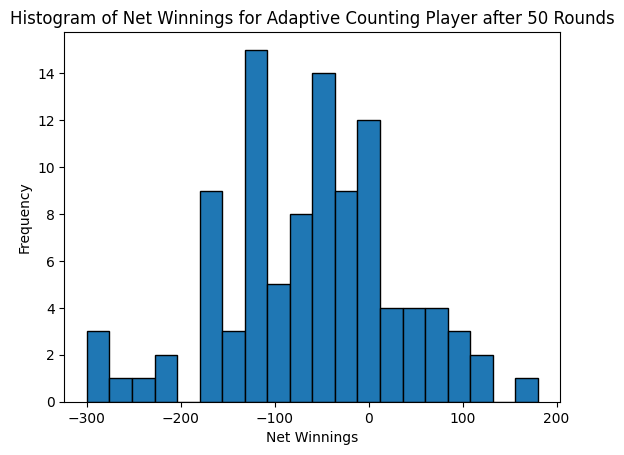

In [ ]:
num_games = 100
num_rounds = 50
initial_chips = 100

# Track winnings for the adaptive strategy
winnings = []

for game in range(num_games):
    deck = Deck()
    adaptive_player = AdaptiveCountingPlayer(name="Adaptive Player", chips=initial_chips, quiet_mode=True)
    dealer = Dealer(name="Dealer", quiet_mode=True)

    # Play specified number of rounds
    for _ in range(num_rounds):
        play_adaptive_round(deck, adaptive_player, dealer)
        deck.shuffle()

    winnings.append(adaptive_player.chips)

#  net winnings by subtracting initial chips
net_winnings = [chips - initial_chips for chips in winnings]

# average winnings, standard deviation, and probability of net gain/loss
average_winnings = np.mean(net_winnings)
std_dev = np.std(net_winnings)
prob_win = sum(1 for win in net_winnings if win > 0) / num_games
prob_loss = sum(1 for win in net_winnings if win < 0) / num_games

# results
print(f"Average net winnings after 50 rounds: {average_winnings}")
print(f"Standard deviation of net winnings: {std_dev}")
print(f"Probability of net win after 50 rounds: {prob_win}")
print(f"Probability of net loss after 50 rounds: {prob_loss}")

#
plt.hist(net_winnings, bins=20, edgecolor='black')
plt.title("Histogram of Net Winnings for Adaptive Counting Player after 50 Rounds")
plt.xlabel("Net Winnings")
plt.ylabel("Frequency")
plt.show()


 ## This new strategy resulted in increased winnings